<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#By-using-the-scripting-interface" data-toc-modified-id="By-using-the-scripting-interface-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>By using the scripting interface</a></span><ul class="toc-item"><li><span><a href="#Time-varying-signal" data-toc-modified-id="Time-varying-signal-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Time varying signal</a></span></li><li><span><a href="#Steady-signal" data-toc-modified-id="Steady-signal-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Steady signal</a></span></li></ul></li><li><span><a href="#By-using-the-funtion-library" data-toc-modified-id="By-using-the-funtion-library-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>By using the funtion library</a></span><ul class="toc-item"><li><span><a href="#Time-varying-signal" data-toc-modified-id="Time-varying-signal-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Time varying signal</a></span></li><li><span><a href="#Steady-signal" data-toc-modified-id="Steady-signal-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Steady signal</a></span></li></ul></li></ul></div>


# How to compute acoustic Sharpness 
This tutorial explains how to use MOSQITO to compute the acoustic sharpness of a signal. Two approaches are possible: scripting interface and function library. The users that just need to compute SQ metrics should preferably use the scripting interface approach. The function library approach is dedicated to the users that would like to integrate MOSQITO functions in another software for instance.

## By using the scripting interface
### Time varying signal
An Audio object is first created by importing an audio file. In this example, the signal is imported from a .wav file. The tutorial [how to import a signal](./tuto_import_signal.ipynb) gives more information about the syntax of the import and the other supported files type. Check the tutorial [Audio signal basic operations](./signal_basic_operations.ipynb) to learn how to plot the time signal, compute and plot its 1/3 octave band spectrum, compute its overall level, etc.

In [1]:
# Add MOSQITO to the Python path
import sys
sys.path.append('..')

# Import MOSQITO color sheme [Optional]
from mosqito import COLORS

# Import Audio class
from mosqito.classes.Audio import Audio

# Create an Audio object
woodpecker = Audio(
    "../mosqito/validations/loudness_zwicker/data/ISO_532-1/Annex B.5/Test signal 24 (woodpecker).wav",
    calib=2 * 2 ** 0.5,
)

The acoustic sharpness is computed using the following command line. The function takes 2 input arguments: 
- "method", that can be set to "din", "bismarck, "aures" or "fastl" depending on the computation method chosen,
- "skip", that corresponds to the cut of the transient effect at the beginning of the signal.

The Loudness to be weighted is automatically computed by using the Zwicker method (see the corresponding [documentation](../documentation/loudness-time-varying.md) for more information) 

In [2]:
woodpecker.compute_sharpness(method="din", skip=0.2)

The preceeding command computes the sharpness of the audio signal as a function of time. Its value can be plotted with the following command. The "time" argument indicates that the sharpness shall be plotted over time. The optional type_plot argument is obviously used to specifies the plot type (among "curve", "bargraph", "barchart" and "quiver"). The optional color_list argument is used to specify the color scheme used for the plots.

In [6]:
woodpecker.sharpness["din"].plot_2D_Data(
    "time",
    type_plot="curve",
    color_list=COLORS,
)

IndexError: list index out of range

In [5]:
woodpecker.is_stationary

False

### Steady signal
For a steady signal, the syntax is almost equivalent, see below.

In [14]:
# Create an Audio object
bbnoise = Audio(
    r"..\mosqito\validations\sharpness\data\Check_signals_DIN_45692_(Schaerfe)\Broadband_noise(fo=10kHz_fu=variabel)\LC2500.WAV",
    is_stationary=True,
)

# Compute sharpness (method is set to "din" by default)
bbnoise.compute_sharpness(method="din")

DIN sharpness: 3.6876236544360963 acum


## By using the funtion library
### Time varying signal
The commands below shows how to compute the sharpness of a time varying signal by directly using the functions from MOSQITO. 

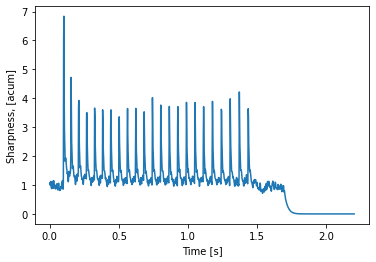

In [10]:
# Import useful packages
import numpy as np
import matplotlib.pyplot as plt

# Import MOSQITO functions
from mosqito.functions.shared.load import load
from mosqito.functions.sharpness.comp_sharpness import comp_sharpness

# Load signal 
signal, fs = load(
    False,
    "../mosqito/validations/loudness_zwicker/data/ISO_532-1/Annex B.5/Test signal 24 (woodpecker).wav", 
    calib = 2 * 2**0.5 
)

# Sharpness calculation
sharpness = comp_sharpness(False, signal, fs, method="din", skip=0.2)

# Plot
S = sharpness['values']
time = np.linspace(0,0.002*(S.size - 1),S.size)
plt.plot(time, S)
plt.xlabel("Time [s]")
plt.ylabel("Sharpness, [acum]")
plt.show()

### Steady signal
The commands below shows how to compute the sharpness of a steady signal by directly using the functions from MOSQITO. 

In [11]:
# Import useful packages
import numpy as np
import matplotlib.pyplot as plt

# Import MOSQITO functions
from mosqito.functions.shared.load import load
from mosqito.functions.sharpness.comp_sharpness import comp_sharpness

# Load signal 
signal, fs = load(
    True,
    r"..\mosqito\validations\sharpness\data\Check_signals_DIN_45692_(Schaerfe)\Broadband_noise(fo=10kHz_fu=variabel)\LC2500.WAV", 
    calib = 1
)

# Sharpness calculation
sharpness = comp_sharpness(True, signal, fs, method="din")


DIN sharpness: 3.6876236544360963 acum
